In [59]:
!git clone https://github.com/niazwazir/ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS.git

Cloning into 'ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 238.89 KiB | 19.91 MiB/s, done.


In [60]:
!ls

electrical-energy-consumption		    model_plot.png
ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS  sample_data


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [62]:
# Ignore all warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('electrical-energy-consumption/Energy_consumption_dataset.csv')

In [64]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [66]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [67]:
monthly_average_consumption = df.groupby('Month')['EnergyConsumption'].mean()

In [68]:
monthly_average_consumption = monthly_average_consumption.reset_index()

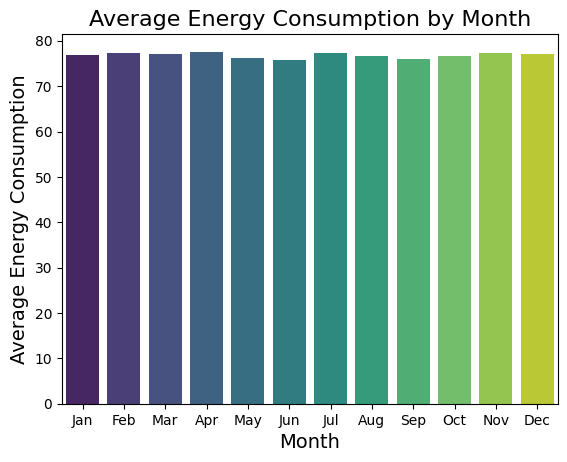

In [69]:
sns.barplot(x='Month', y= 'EnergyConsumption', data=monthly_average_consumption, palette='viridis')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

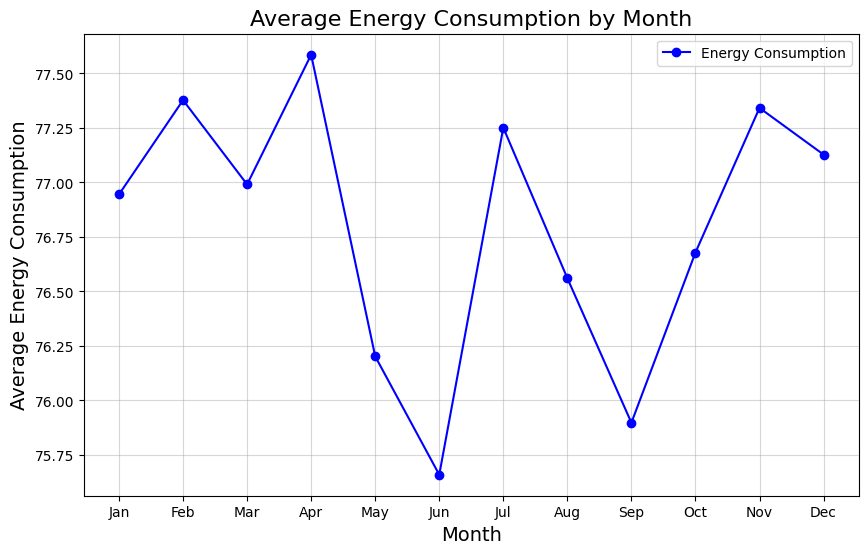

In [70]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_consumption['Month'],
         monthly_avg_consumption['EnergyConsumption'],
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

The Average Energy Consumption values remain relatively stable throughout the year, ranging from 75 to 79 across the months. This suggests that energy consumption does not significantly vary based on the month alone.

As a result, creating dummy variables for the "Month" column might not contribute much predictive value to the model. Instead, we could consider the following approaches:

    Drop the "Month" column entirely to simplify the model.
    Introduce a new "Season" column to capture potential seasonal patterns by grouping months with similar characteristics. This approach preserves insights into how energy consumption might vary by season without adding unnecessary complexity.

In [71]:
def get_season(month):
    if month in [3, 4, 5]:  # Summer: Mar, Apr, May
        return 'Summer'
    elif month in [6, 7, 8]:  # Monsoon: Jun, Jul, Aug
        return 'Monsoon'
    elif month in [9, 10, 11]:  # Autumn: Sep, Oct, Nov
        return 'Autumn'
    else:  # Winter: Dec, Jan, Feb
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]

In [72]:
df.Season.value_counts()

,count
Season,
Winter,1400
Summer,1200
Monsoon,1200
Autumn,1200


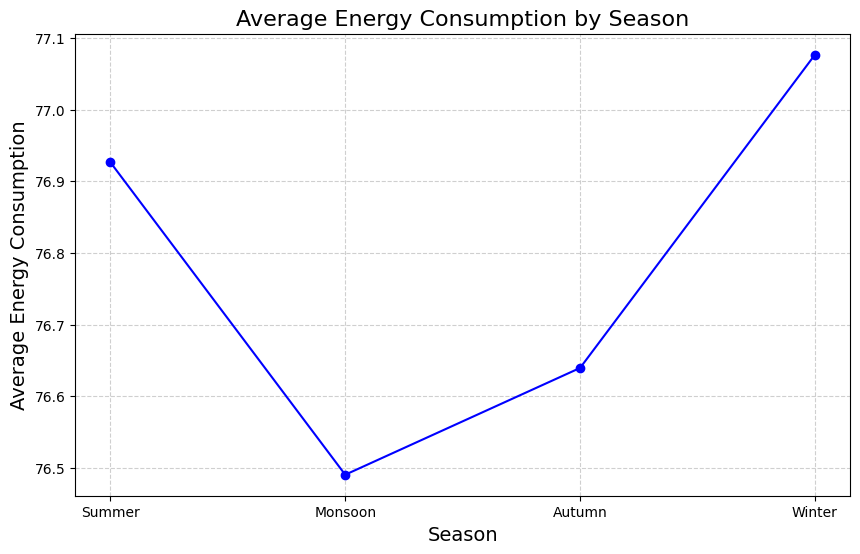

In [73]:
season_avg_consumption = df.groupby('Season')['EnergyConsumption'].mean().reset_index()

# Define the order of seasons
season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'], categories=season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'], season_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

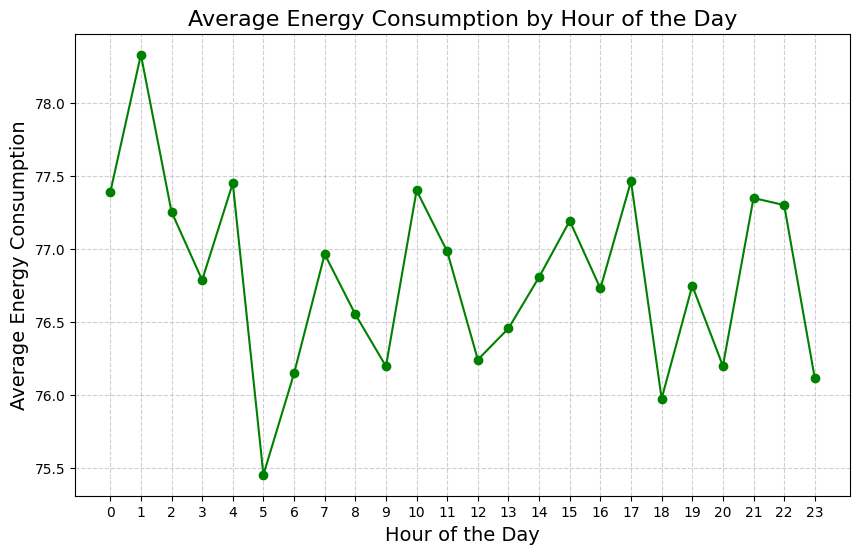

In [74]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='g')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Hour range from 0 to 23
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

Although there are some variations in Energy Consumption throughout the day, the values remain within a narrow range of 75 to 79. This indicates that energy consumption does not significantly differ by individual hour.  

Creating dummy variables for all 24 hours (0 to 23) would substantially increase the dimensionality of the dataset, complicating the model and potentially leading to issues like overfitting.  

To simplify the model while still capturing time-of-day effects, we can group the hours into broader time periods with similar energy consumption patterns:  

- **Morning**: 6 AM to 12 PM  
- **Afternoon**: 12 PM to 6 PM  
- **Evening**: 6 PM to 9 PM  
- **Night**: 9 PM to 6 AM  

This approach reduces the number of features, lowers the model’s complexity, and retains valuable insights into how energy consumption varies across different parts of the day.

In [75]:
def get_time_of_day(hour):
    if 4 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]

In [76]:
df.head()

,Season,TimeOfDay,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


<Axes: ylabel='count'>

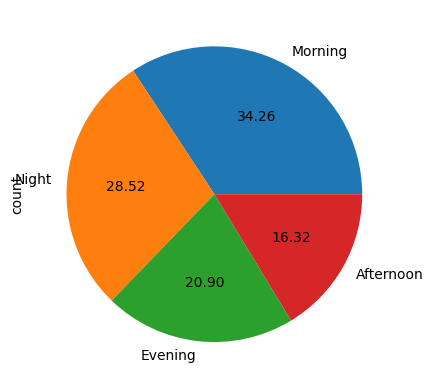

In [77]:
df.TimeOfDay.value_counts().plot(kind='pie', autopct='%.2f')

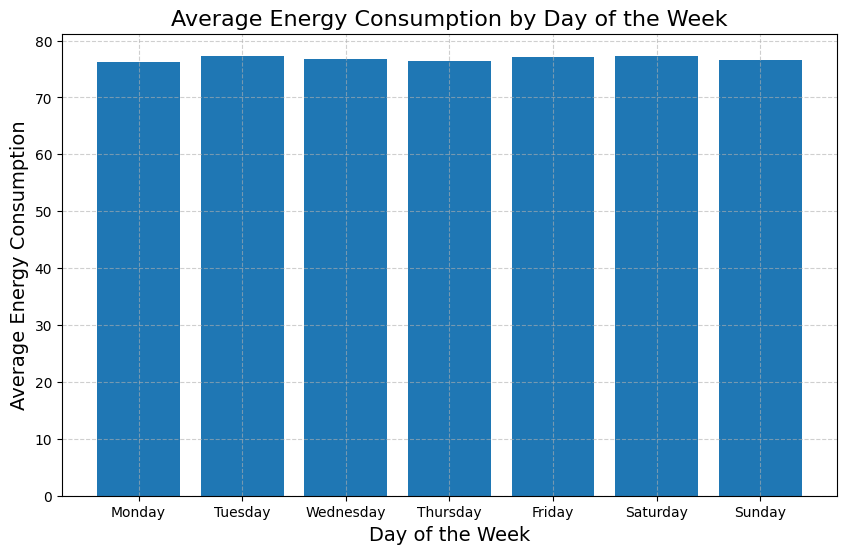

In [78]:
dayofweek_avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# Sort the days of the week to ensure correct order
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_avg_consumption = dayofweek_avg_consumption.sort_values('DayOfWeek')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'], dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()



In [79]:
df.drop('DayOfWeek', axis=1, inplace=True)

In [80]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False


In [81]:
X = df.drop(columns=['EnergyConsumption'])

y = df['EnergyConsumption']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [83]:
X_train.shape

(4000, 14)

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [85]:
X_train_scaled

array([[0.38356624, 0.16583629, 0.78710351, ..., 1.        , 0.        ,
        1.        ],
       [0.03026714, 0.67376719, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05697615, 0.34603388, 0.39311902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.87394221, 0.35380599, 0.58082363, ..., 0.        , 1.        ,
        1.        ],
       [0.60222829, 1.        , 0.88663545, ..., 1.        , 1.        ,
        1.        ],
       [0.31837734, 0.96334379, 0.8799872 , ..., 0.        , 1.        ,
        0.        ]])

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [87]:
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Add, Conv1D, Flatten, LeakyReLU, Reshape
)
from tensorflow.keras.models import Model

inputs = Input(shape=(14,))  # Input shape (batch_size, 14 features)

# Reshape input to (batch_size, 14, 1) for Conv1D
x = Reshape((14, 1))(inputs)

# Conv1D layer with LeakyReLU
x = Conv1D(filters=32, kernel_size=3, padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)

# Another Conv1D layer with LeakyReLU
x = Conv1D(filters=16, kernel_size=3, padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)

# Flatten before Dense layers
x = Flatten()(x)

# Dense layer 1
dense1 = Dense(32)(x)
dense1 = LeakyReLU(alpha=0.1)(dense1)
dense1 = Dropout(0.01)(dense1)

# Dense layer 2
dense2 = Dense(8, activation='relu')(dense1)

# Dense layer 3 with 32 units to match skip connection
dense3 = Dense(32)(dense2)
dense3 = LeakyReLU(alpha=0.1)(dense3)

# Skip connection: add dense1 and dense3 outputs (both shape 32)
skip = Add()([dense1, dense3])

# Output layer
outputs = Dense(1, activation='linear')(skip)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 14, 1)     │          0 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 14, 32)    │        128 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 14, 32)    │          0 │ conv1d_2[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 14, 16)    │      1,552 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 14, 16)    │          0 │ conv1d_3[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 224)       │          0 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      7,200 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 32)        │          0 │ dense_19[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 8)         │        264 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │        288 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_7       │ (None, 32)        │          0 │ dense_21[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 32)        │          0 │ dropout_5[0][0],  │
│                     │                   │            │ leaky_re_lu_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1)         │         33 │ add_4[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,465 (36.97 KB)

 Trainable params: 9,465 (36.97 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=Huber(),
              metrics=['mae'])

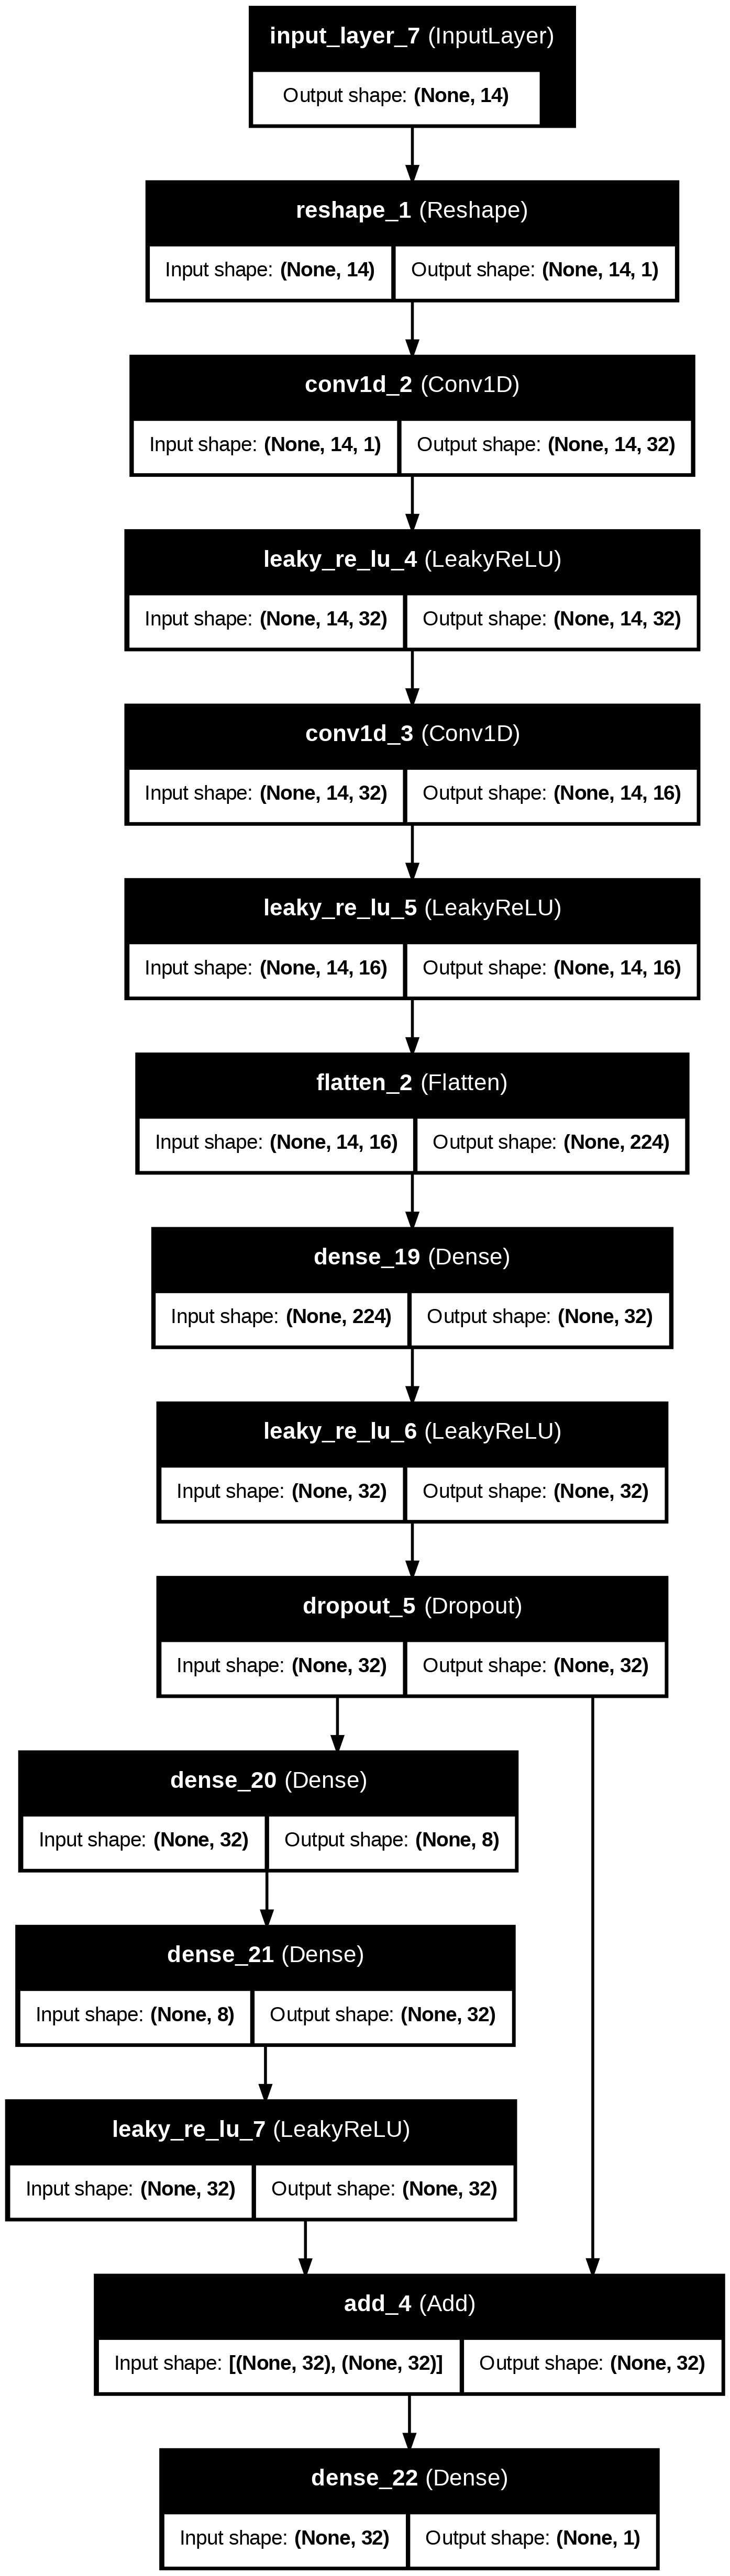

In [89]:
from tensorflow.keras.utils import plot_model

# Plot and save the model architecture as an image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [90]:
history = model.fit(X_train_scaled, y_train,
                    validation_data= (X_test_scaled, y_test),
                    epochs = 500,
                    batch_size=32,
                    verbose=1)

Epoch 1/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 39.3739 - mae: 39.8684 - val_loss: 8.1472 - val_mae: 8.6305
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1707 - mae: 8.6589 - val_loss: 6.7808 - val_mae: 7.2660
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9035 - mae: 7.3901 - val_loss: 6.6018 - val_mae: 7.0892
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4548 - mae: 6.9408 - val_loss: 5.9620 - val_mae: 6.4449
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2948 - mae: 6.7795 - val_loss: 5.8928 - val_mae: 6.3726
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2082 - mae: 6.6904 - val_loss: 6.3652 - val_mae: 6.8521
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2084 - mae: 6.6934 - val_loss: 7.4249 - val_mae: 7.9092
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1701 - mae: 6.6529 - val_loss: 6.0948 - val_mae: 6.5806
Epoch 9/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

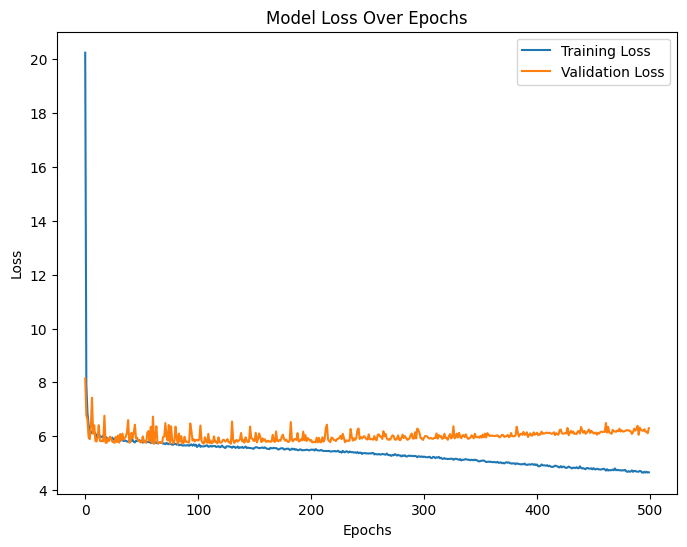

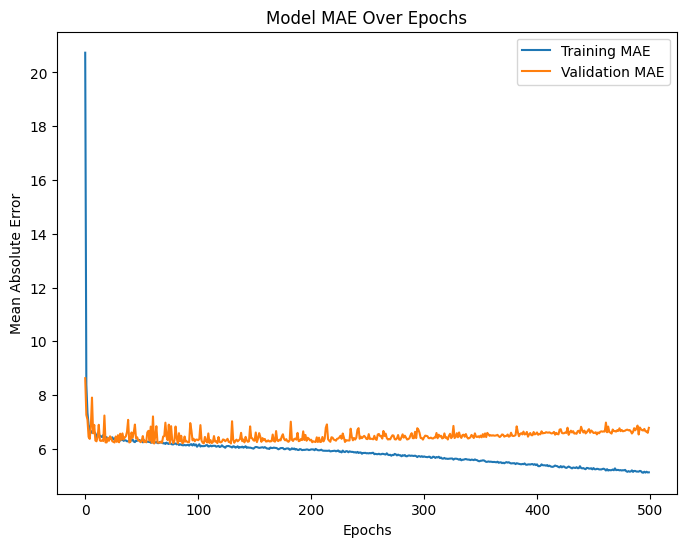

In [91]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [92]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6101 - mae: 7.0988
Test Loss: 6.29533576965332
Test MAE: 6.783872127532959


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


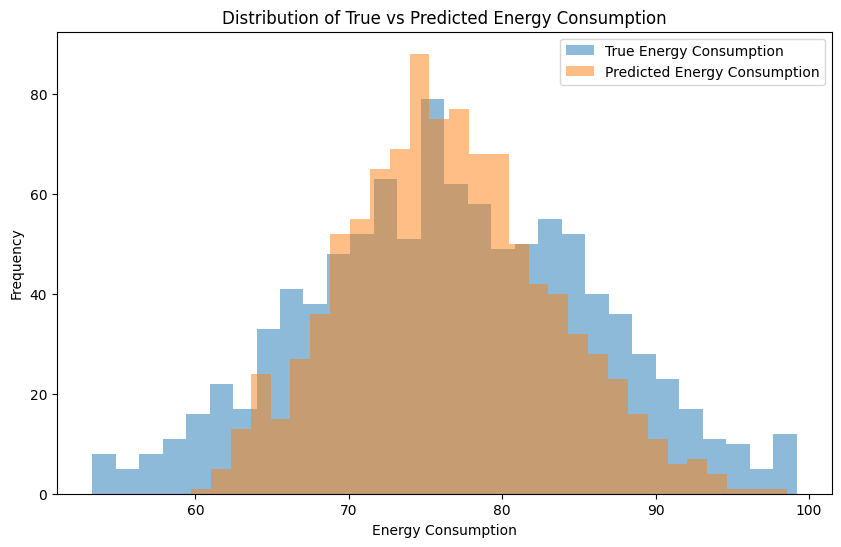

In [93]:
y_pred = model.predict(X_test_scaled)

# Plot histograms of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Energy Consumption')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of True vs Predicted Energy Consumption')
plt.legend(loc='upper right')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


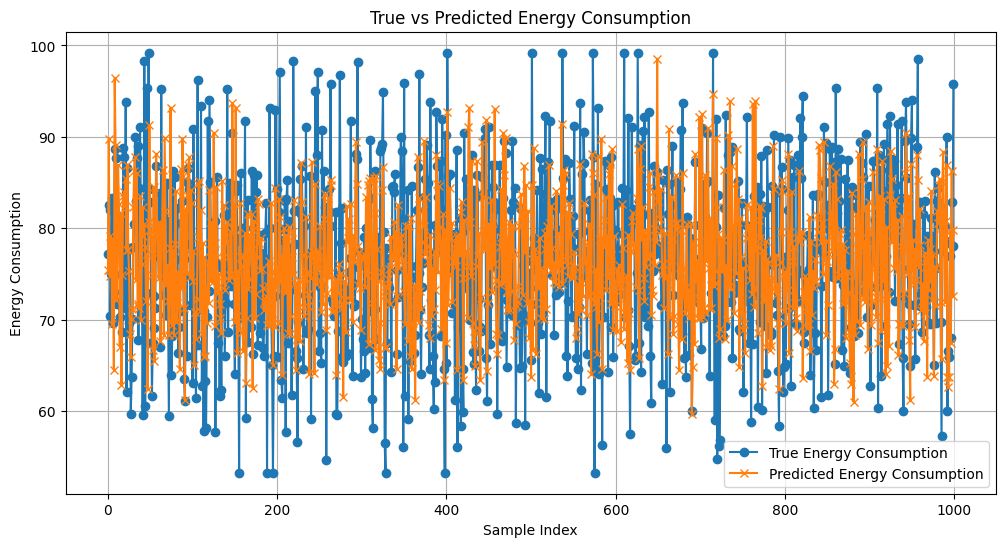

In [96]:
import matplotlib.pyplot as plt

# Convert y_test (Pandas Series) to numpy array
y_test_array = y_test.to_numpy()  # or y_test.values

# Predict (y_pred is already a numpy array)
y_pred = model.predict(X_test_scaled)

# Flatten arrays if they have extra dimensions
y_test_flat = y_test_array.flatten()
y_pred_flat = y_pred.flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label='True Energy Consumption', marker='o')
plt.plot(y_pred_flat, label='Predicted Energy Consumption', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption')
plt.title('True vs Predicted Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Absolute Error (MAE): 6.783870604758285
Mean Squared Error (MSE): 71.74756330028683
Root Mean Squared Error (RMSE): 8.470393337991267
R² Score: 0.17381211661352858
Explained Variance Score: 0.1743408231250888


In [ ]:
model.save('model.keras')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
!git clone https://github.com/niazwazir/ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS.git

Cloning into 'ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 838.37 KiB | 1.79 MiB/s, done.


In [3]:
!ls

ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS  sample_data


In [4]:
cd ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS/

/content/ELECTRICAL_ENERGY_CONSUMPTION_CALCULATIONS


In [5]:
!ls

AEP_hourly.csv	Energy_consumption_dataset.csv


In [6]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [9]:
# Extract all Data Like Year, Month, Day, Time, etc.
dataset = df.copy()  # It's safer to copy the dataframe to avoid modifying original df

dataset["Month"] = pd.to_datetime(dataset["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(dataset["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(dataset["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(dataset["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(dataset["Datetime"]).dt.isocalendar().week  # Updated here
dataset["Day"] = pd.to_datetime(dataset["Datetime"]).dt.day_name()

# Set Datetime as index and ensure datetime type
dataset = dataset.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)

dataset.head(1)


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [10]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



<ipython-input-11-beb54253739e>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Energy Consumption According to Year')

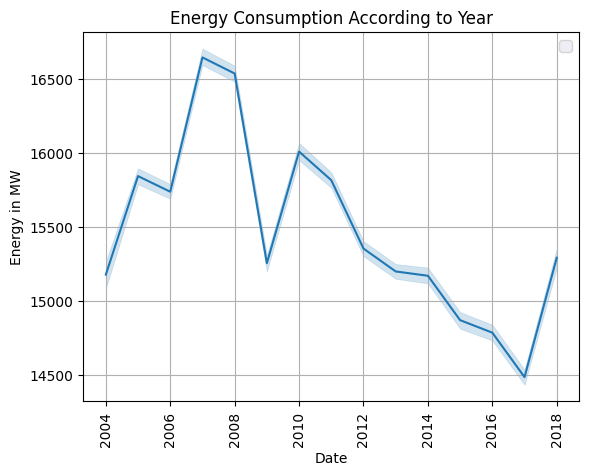

In [11]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

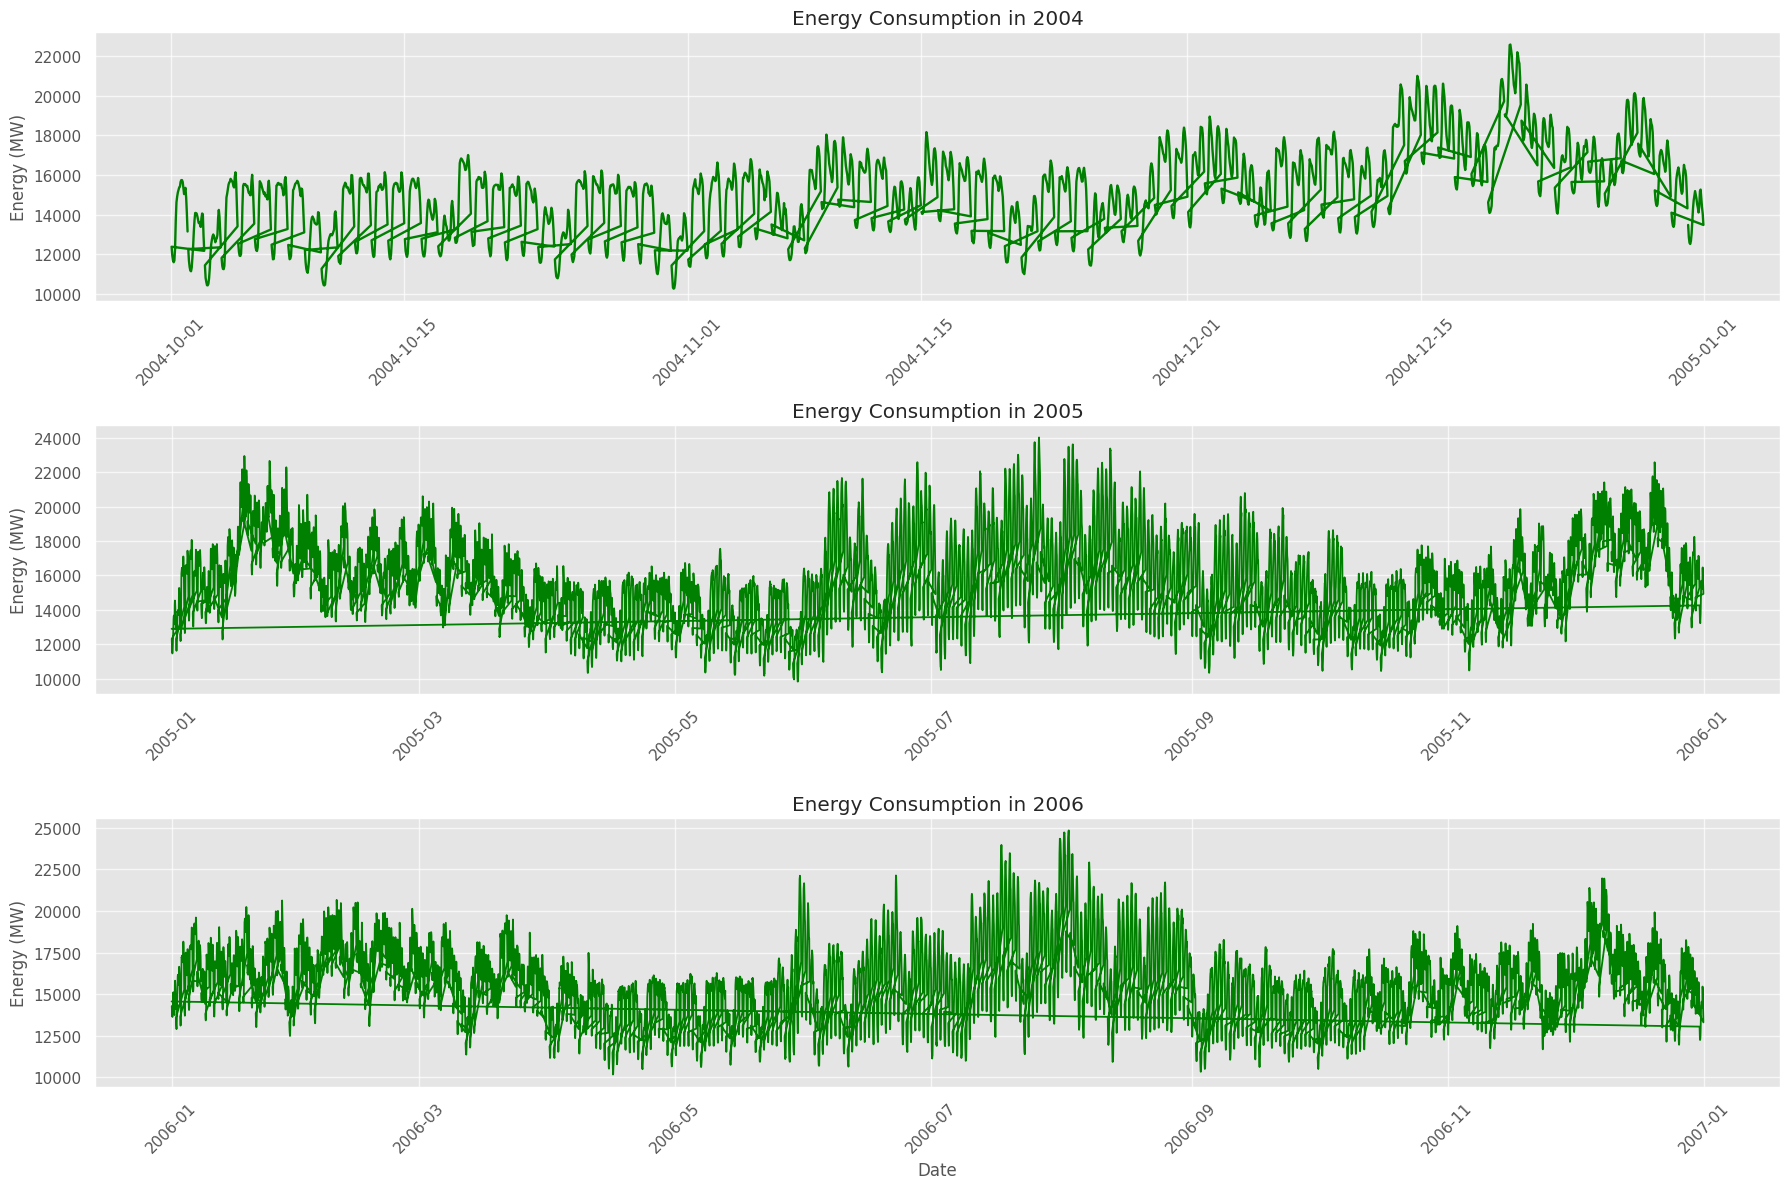

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Ensure the index is datetime type
dataset.index = pd.to_datetime(dataset.index)

# Set the plotting style and figure size
style.use('ggplot')
plt.rcParams["figure.figsize"] = (18, 12)

# Create subplots: 3 rows, 1 column
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False)

# Plot for 2004
data_2004 = dataset.loc['2004']
ax1.plot(data_2004.index, data_2004['AEP_MW'], color='green', linewidth=1.7)
ax1.set_title('Energy Consumption in 2004')
ax1.set_ylabel('Energy (MW)')
ax1.grid(True, alpha=0.7)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Plot for 2005
data_2005 = dataset.loc['2005']
ax2.plot(data_2005.index, data_2005['AEP_MW'], color='green', linewidth=1.3)
ax2.set_title('Energy Consumption in 2005')
ax2.set_ylabel('Energy (MW)')
ax2.grid(True, alpha=0.7)
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)

# Plot for 2006
data_2006 = dataset.loc['2006']
ax3.plot(data_2006.index, data_2006['AEP_MW'], color='green', linewidth=1.3)
ax3.set_title('Energy Consumption in 2006')
ax3.set_xlabel('Date')
ax3.set_ylabel('Energy (MW)')
ax3.grid(True, alpha=0.7)
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()


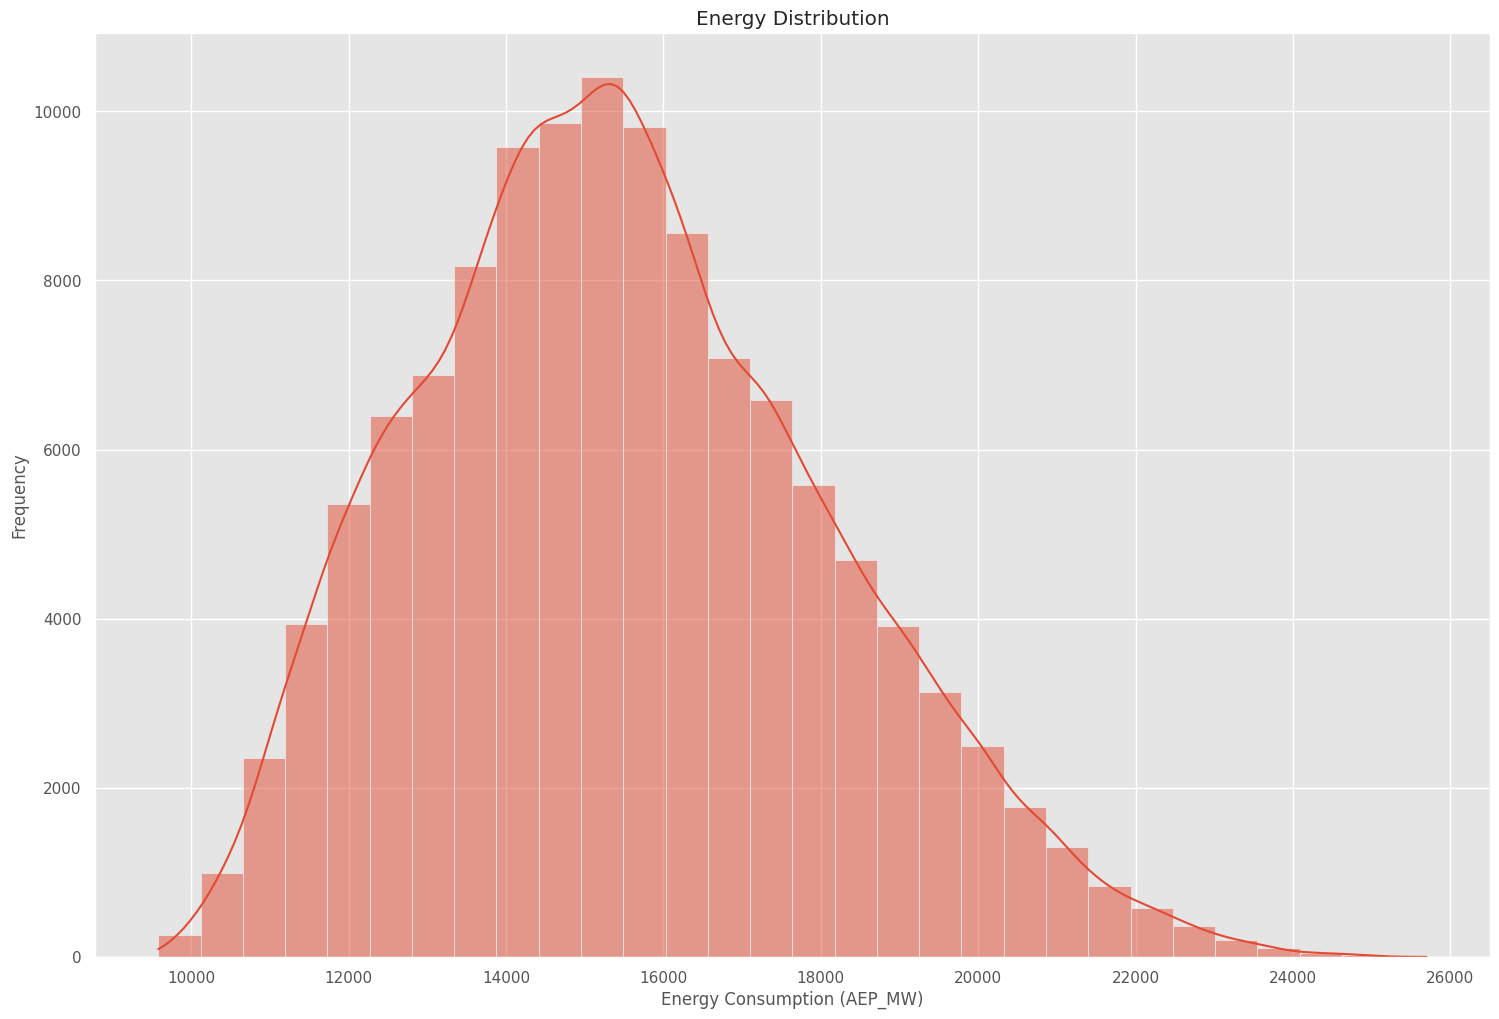

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset["AEP_MW"], kde=True, bins=30)
plt.title("Energy Distribution")
plt.xlabel("Energy Consumption (AEP_MW)")
plt.ylabel("Frequency")
plt.show()


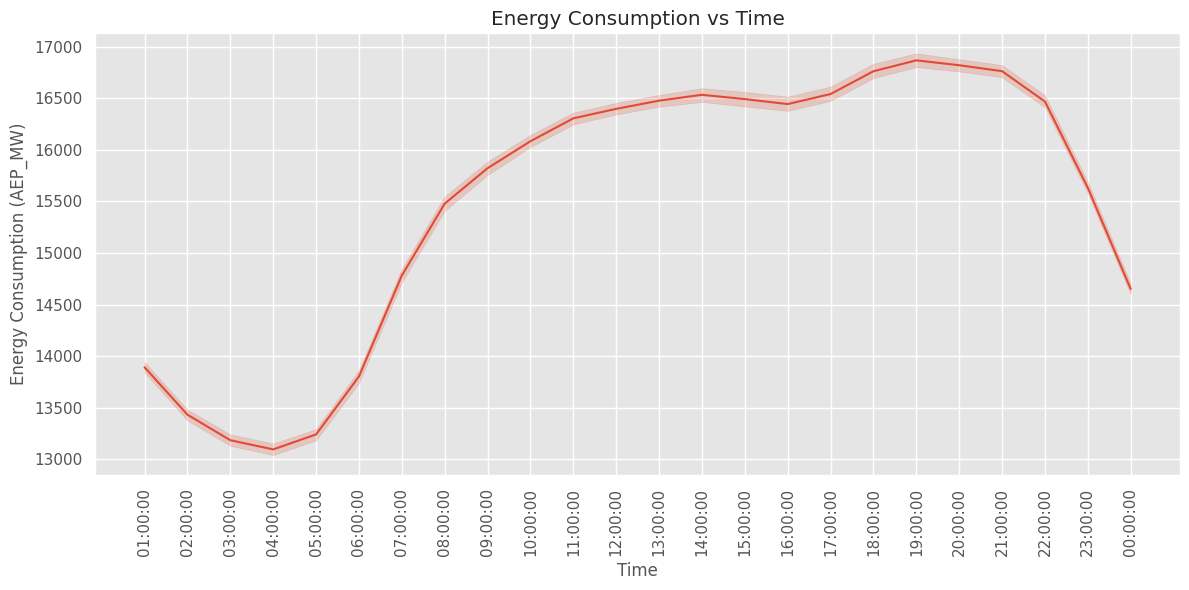

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

# Convert 'Time' to string for plotting
sns.lineplot(x=dataset["Time"].astype(str), y=dataset["AEP_MW"], ax=ax1)

ax1.set_title("Energy Consumption vs Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("Energy Consumption (AEP_MW)")
ax1.grid(True, alpha=1)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()


In [19]:
# Select only numeric columns before resampling and averaging
numeric_cols = dataset.select_dtypes(include='number').columns
NewDataSet = dataset[numeric_cols].resample('D').mean()

In [20]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [21]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [22]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [25]:
from sklearn.preprocessing import MinMaxScaler

# If Training_Set is already a NumPy array, do NOT use .values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)


In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [65]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
# Assuming X_Train, y_train, X_Test, y_test are prepared and shaped correctly

# Train the model with validation data to get training and testing loss
history = regressor.fit(
    X_Train, Y_Train,
    epochs=50,
    batch_size=32,
    validation_data=(X_Test, y_test),  # Explicit validation data (testing loss)
    verbose=1
)

# Plot training and testing (validation) loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss During Model Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'X_Test' is not defined

In [66]:
history = regressor.fit(X_Train, Y_Train, epochs = 10, batch_size = 32)

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0326
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0187
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0178
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0171
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0158
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0164
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0151
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0146
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0140
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0114


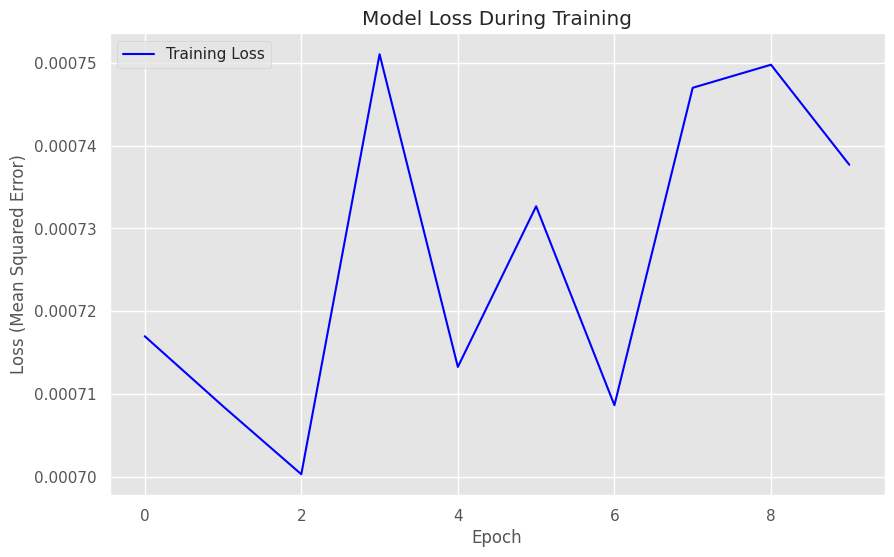

In [61]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [68]:

# Compile with MAE metric
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with validation data
history = regressor.fit(
    X_Train, Y_Train,
    epochs=50,
    batch_size=32,
    validation_data=(X_Test, y_test),
    verbose=1
)

# Plot training and testing loss and MAE
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Testing Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Testing MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'X_Test' is not defined

In [46]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [47]:
TestData.shape

(100, 4)

In [48]:
NewDataSet.shape

(5055, 4)

In [49]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [50]:
Df_Total.shape

(5155, 1)

In [51]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [52]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [53]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [54]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [55]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,14498.137695
1,2018-04-27,12964.000000,14066.266602
2,2018-04-28,12237.583333,15492.975586
3,2018-04-29,12156.791667,14981.023438
4,2018-04-30,13443.500000,14667.333008
...,...,...,...
95,2018-07-30,15368.083333,16381.040039
96,2018-07-31,15180.291667,16120.575195
97,2018-08-01,15151.166667,15374.490234
98,2018-08-02,15687.666667,15199.318359


In [56]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

<ipython-input-57-49990e294976>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


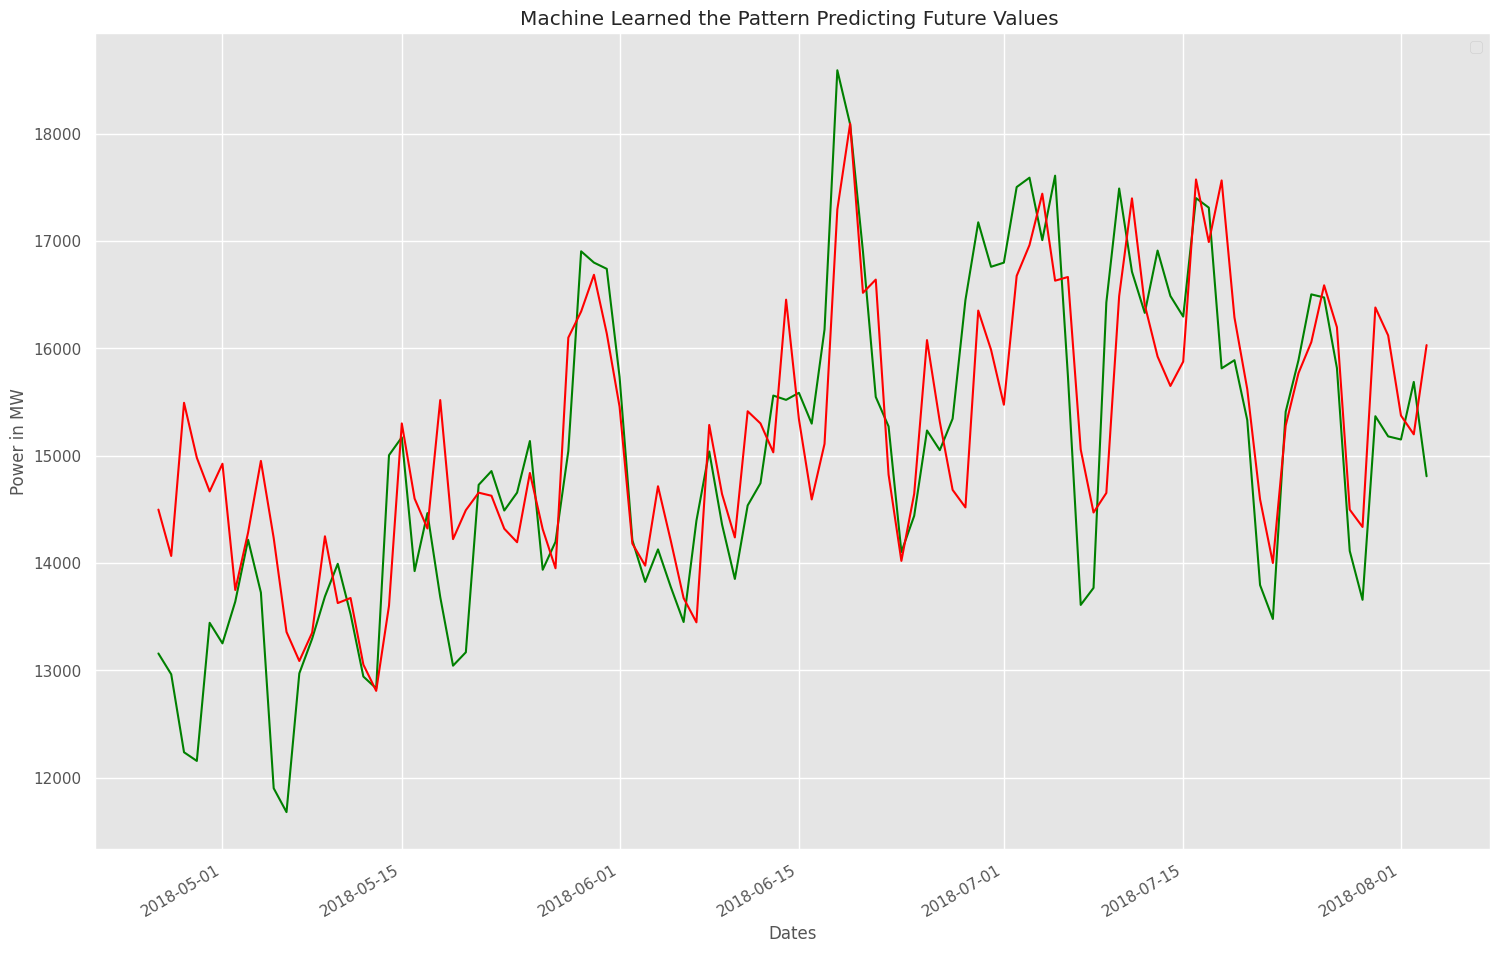

In [57]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

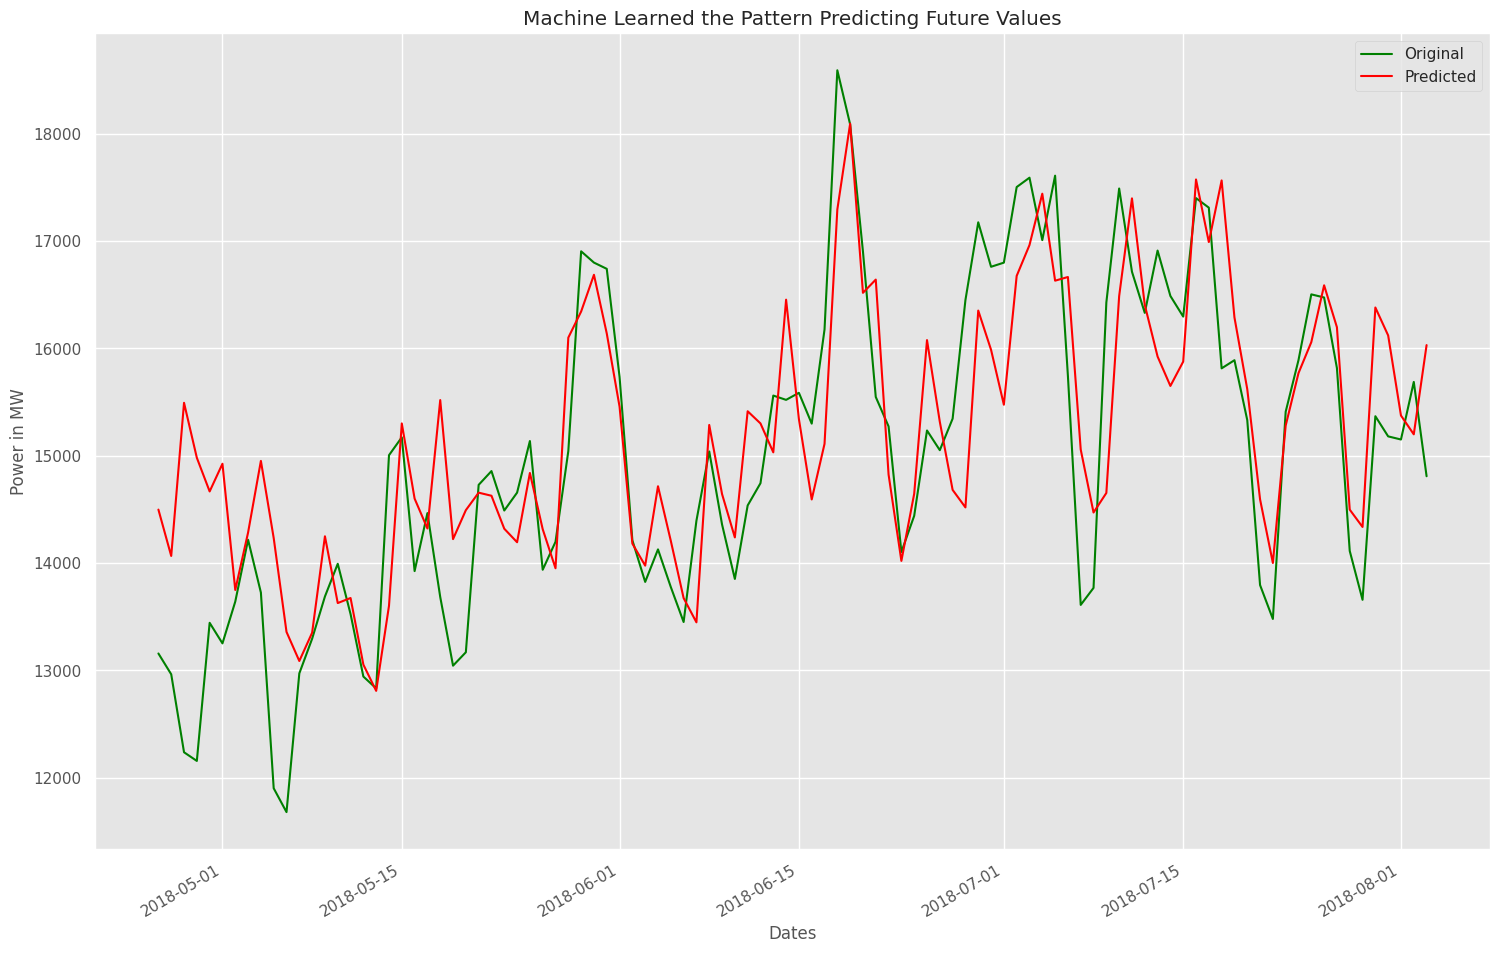

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt

plt.plot(x, y, color="green", label="Original")
plt.plot(x, y1, color="red", label="Predicted")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values")

plt.legend()  # Show legend with the labels provided

plt.show()
